In [6]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import time
import pymongo
import spacy
from pymongo import MongoClient
tqdm.pandas()
import string
import re
import nltk
import tensorflow as tf
from bs4 import BeautifulSoup
from nltk.stem import PorterStemmer
nltk.download('wordnet')
from nltk.corpus import stopwords
import random
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to C:\Users\Nitro
[nltk_data]     5\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

In [10]:
tf.random.set_seed(17)
np.random.seed(17)
random.seed(17)

In [11]:
connection = MongoClient('localhost' , 27017)
db = connection['mydb']
collection = db['Preprocessed_Lemmatized_Data']

In [12]:
cursor = collection.find({})

glove_df  = pd.DataFrame(list(cursor))

In [13]:
glove_df.head()

,_id,review,word count,positive
0,6654671a51740e67c98a68bb,one reviewer mention watch 1 oz episode hook r...,307,1
1,6654671a51740e67c98a68bc,wonderful little production film technique una...,162,1
2,6654671a51740e67c98a68bd,I think wonderful way spend time hot summer we...,166,1
3,6654671a51740e67c98a68be,basically family little boy jake think zombie ...,138,0
4,6654671a51740e67c98a68bf,petter matteis love time money visually stunni...,230,1


In [14]:
X = glove_df['review']

In [15]:
X[0]

'one reviewer mention watch 1 oz episode hook right exactly happen methe first thing strike I oz brutality unflinche scene violence set right word go trust I show faint hearted timid show pull punch regard drug sex violence hardcore classic use wordit call oz nickname give oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inward privacy high agenda em city home manyaryan muslims gangstas latinos christians italian irish moreso scuffle death stare dodgy dealing shady agreement never far awayi would say main appeal show due fact go show would dare forget pretty picture paint mainstream audience forget charm forget romanceoz mess around first episode I ever see strike I nasty surreal I could say I ready I watch I develop taste oz get accustomed high level graphic violence violence injustice crook guard sell nickel inmate kill order get away well mannered middle class inmate turn prison bitch due lack street skill prison e

In [16]:
y = glove_df['positive']
type(y)

pandas.core.series.Series

In [17]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state= 42)

In [18]:
X_test.index

Index([33553,  9427,   199, 12447, 39489, 42724, 10822, 49498,  4144, 36958,
       ...
       29598, 43515, 15832, 37692, 26859, 28567, 25079, 18707, 15200,  5857],
      dtype='int64', length=10000)

In [19]:
#Creating Dataframe to Check later with the result
input_dict = {
 'Reviews' : list(X_test),
 "Real index" : X_test.index,
 'Real Sentiment' : list(y_test)
}
index = range(len(X_test))

checking_df = pd.DataFrame(input_dict , index = index )


In [20]:
checking_df

,Reviews,Real index,Real Sentiment
0,I really like summerslam due look arena curtai...,33553,1
1,many television show appeal quite many differe...,9427,1
2,film quickly get major chase scene ever increa...,199,0
3,jane austen would definitely approve onegwynet...,12447,1
4,expectation somewhat high I I go see movie I t...,39489,0
...,...,...,...
9995,although casper van dien michael rooker genera...,28567,0
9996,I like movie I really sure I start watch enjoy...,25079,1
9997,yes nonsingaporean see big deal film reference...,18707,1
9998,far film go likable enough entertaining charac...,15200,0


Implementing GloVe Model

In [21]:
#Creating a lookup embedding Dictonary 

embedding_dict = {}
glove_filepath = 'D:/KU/3rd Year/2nd Semester/ReelFeel/gloVe Data/glove.6B.200d.txt'
glove_file = open(glove_filepath, encoding='utf8')

for line in glove_file:
   records = line.split()
   word = records[0]
   vector_dimensions = np.asarray(records[1:] , 'float32')
   embedding_dict[word] = vector_dimensions

glove_file.close()

In [22]:
# In the embedding dictionary , the keys are words and the values are 200D vectors

In [23]:

embedding_dict['girl']

array([ 0.62272  , -0.19083  , -0.60219  , -0.85413  , -0.2052   ,
       -0.26324  , -0.41696  , -0.022565 , -0.0099956, -0.52681  ,
        0.42404  ,  0.28039  ,  0.78622  ,  0.19919  , -0.14439  ,
       -0.075402 , -0.44889  , -0.34637  , -0.041481 ,  0.7358   ,
        1.1457   ,  2.123    ,  0.035325 ,  0.14424  , -0.33797  ,
       -0.57999  ,  0.63102  , -1.045    , -0.39462  ,  0.18689  ,
       -0.27755  , -0.13166  , -0.11722  ,  0.55667  ,  0.33812  ,
       -0.067164 , -0.44045  , -0.060977 , -0.43767  , -0.079075 ,
       -0.012348 ,  0.045585 , -0.78292  ,  0.23381  , -0.58355  ,
        0.19219  ,  0.68733  , -0.20972  ,  0.24034  ,  0.92431  ,
        0.36902  , -0.51364  , -0.48829  , -0.43811  , -0.55089  ,
        0.1093   , -0.67436  ,  0.13182  ,  0.21296  ,  0.021566 ,
       -0.66156  , -0.30518  , -0.19201  ,  0.89088  , -0.17874  ,
       -0.55718  ,  0.57685  ,  0.16078  , -0.036751 , -0.047033 ,
        0.21968  , -0.24861  , -0.55584  ,  0.63159  , -0.5277

In [24]:
#Creating function to find similiar words
def find_similar_words(target_word_value):
 return sorted(embedding_dict.keys() , key = lambda word: spatial.distance.euclidean(embedding_dict[word] , target_word_value))

In [25]:
find_similar_words(embedding_dict['girl'])[:10]

NameError: name 'spatial' is not defined

In [26]:
find_similar_words(embedding_dict['ball'])[:10]

NameError: name 'spatial' is not defined

In [19]:
X_train

39087    I keep ask many fight scream match swear gener...
30893    I watch entire movie I could watch entire movi...
45278    touching love story reminiscent in mood love ...
16398    latterday fulci schlocker totally abysmal conc...
13653    first I firmly believe norwegian movie continu...
                               ...                        
11284    shadow magic recapture joy amazement first mov...
44732    I find movie quite enjoyable fairly entertain ...
38158    avoid one terrible movie exciting pointless mu...
860      production quite surprise I I absolutely love ...
15795    decent movie although little bit short time I ...
Name: review, Length: 40000, dtype: object

In [28]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [30]:
X_train

[[1,
  108,
  318,
  44,
  254,
  769,
  673,
  2150,
  644,
  4264,
  8102,
  10801,
  96,
  1398,
  30,
  339,
  19,
  3511,
  12,
  52,
  869,
  1957,
  985,
  253,
  98,
  776,
  119,
  8458,
  64,
  976,
  28490,
  1570,
  1880,
  26,
  10,
  330,
  147,
  21257,
  117,
  2991,
  1,
  20,
  4,
  895,
  16,
  66,
  3,
  117,
  25,
  10586,
  36466,
  1493,
  8586,
  8,
  112,
  31866,
  44338,
  1363,
  14637,
  312,
  314,
  290,
  1,
  28,
  67,
  271,
  3716,
  1,
  2432,
  272,
  8717,
  1238,
  21258,
  61710,
  61711,
  134,
  80,
  355,
  1742,
  83,
  2972,
  553,
  401,
  10,
  142,
  50,
  206,
  126,
  185,
  273,
  11,
  1191,
  178,
  61712,
  1583,
  840,
  9467,
  9291,
  585,
  251,
  7,
  2443,
  7995,
  3140,
  1423,
  28491,
  1,
  115,
  120,
  109,
  1,
  890,
  1039,
  7036,
  1,
  4702,
  830,
  2,
  843,
  12714,
  156,
  44339,
  149,
  9,
  44,
  44,
  459,
  2782,
  7037,
  246,
  56,
  2048,
  14638,
  114,
  554,
  239,
  1414,
  22595,
  1917,
  36467,

Saving the word Tokenizer to use it for new datas

In [21]:
with open('word_tokenizer.pkl' , 'wb') as file:
 pickle.dump(word_tokenizer, file , protocol=pickle.HIGHEST_PROTOCOL)

In [27]:
word_tokenizer.word_index

NameError: name 'word_tokenizer' is not defined

In [23]:
X_train[0][:20]

[1,
 108,
 318,
 44,
 254,
 769,
 673,
 2150,
 644,
 4264,
 8102,
 10801,
 96,
 1398,
 30,
 339,
 19,
 3511,
 12,
 52]

In [24]:
# Adding 1 to store dimensions for words for which no pretrained word embedding exists

vocab_length = len(word_tokenizer.word_index) + 1

vocab_length

175402

In [25]:
# padding all reviews to fixed length 100

maxlen = 600
X_train = pad_sequences(X_train ,padding='post', maxlen= maxlen)
X_test = pad_sequences(X_test ,padding='post', maxlen= maxlen)


In [26]:
#Creating an Embedding Matrix having 200 Dimensions
#Each word in the corpus will contain 200-dimensions

embedding_matrix = np.zeros((vocab_length , 200))
for word , index in word_tokenizer.word_index.items():
   embedding_vector = embedding_dict.get(word)
   if embedding_vector is not None:
      embedding_matrix[index] = embedding_vector
     

In [27]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.26804999,  0.36032   , -0.33199999, ...,  0.17769   ,
         0.22362   ,  0.014241  ],
       [ 0.33201   ,  0.30195001, -0.88213003, ...,  0.075378  ,
         0.39153999,  0.57608998],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [28]:
# df = pd.DataFrame(embedding_matrix)

In [29]:
# df

In [30]:
# df.to_csv('Embedding_Matrix.csv' , index = False)

In [31]:
embedding_matrix[2]

array([ 3.32010001e-01,  3.01950008e-01, -8.82130027e-01, -6.07620001e-01,
        1.16949998e-01, -1.94130003e-01, -2.65109986e-01, -4.89879996e-02,
       -1.44160002e-01, -9.89679992e-02,  4.37159985e-01,  3.21640015e-01,
        4.79270011e-01, -2.23470002e-01,  1.05779998e-01, -2.56850004e-01,
       -2.50380009e-01,  1.36029994e+00, -1.24880001e-01, -1.22469999e-01,
        1.54020004e-02,  2.10669994e+00,  3.80309999e-01,  1.46550000e-01,
       -6.49399981e-02,  2.66759992e-01,  4.14119989e-01, -8.63860026e-02,
       -2.16499999e-01, -2.99160004e-01, -1.49540007e-01, -1.73649997e-01,
       -2.13809997e-01,  2.84990013e-01, -1.60180002e-01,  3.69220003e-02,
       -4.02110010e-01, -4.21779990e-01,  4.35130000e-01, -5.91669977e-01,
       -4.15960014e-01,  1.58050001e-01, -3.15490007e-01,  1.14000000e-01,
       -7.02300012e-01, -1.05310000e-01,  8.19999993e-01, -6.56889984e-03,
        4.38430011e-01,  9.30420011e-02,  2.06249997e-01, -2.19960004e-01,
        9.66970026e-02, -

In [32]:
embedding_matrix.shape

(175402, 200)

In [33]:
len(X_train[1])

600

In [34]:
X_train[1]

array([    1,    14,   321,     2,     1,    27,    14,   321,     2,
           1,   323,   176,    14,   259,   218,     1,   724,   149,
          19,    14,   323,    32,  2950, 31869,     7,  3334,     2,
        1385,   570, 10185, 11266,   675,  1385,   232,  3334, 16185,
         182, 10185, 11266,   233,    51,   159,     9,   158,   135,
          45,    42,   977,   181,  1135, 15091, 10185,     4,    22,
          75, 10185,   237,  7282,   258,  2801, 15092,   475,  5331,
          38,   473,  2214,  1135, 15091,   561,    67,   153,    32,
          80,  4342,   105,    17,    22,  1079,   588,  1415,   413,
        1201,   106,   454,   407,    22,   871,   101,   350,  3316,
        1295,   438,   275,    12,    68, 15093,    12,  1908,  2049,
         413,   418,    12,    40,  7037, 10185,   110,    31,   428,
        3602,  2254,  1536,   232,   551,   135, 36469,  1135,    36,
         660,    12,    50,    20,  1510,    12,     2,   500,  3994,
         901,  5666,

In [35]:
X_train.shape

(40000, 600)

In [36]:
y_train.shape

(40000,)

In [37]:
X_test.shape

(10000, 600)

## Creating Neural Network Model

#### Simple Neural Network

In [38]:
snn_model = tf.keras.Sequential()

snn_model.add(tf.keras.layers.Embedding(input_dim= vocab_length , output_dim = 200, weights= [embedding_matrix] ,input_length = maxlen, trainable = False))
snn_model.add(tf.keras.layers.Flatten())
snn_model.add(tf.keras.layers.Dense(32 , activation='relu'))
snn_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


c:\Users\Nitro 5\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [39]:
# Model Compiling

snn_model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['acc'])
snn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │    35,080,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,080,400 (133.82 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 35,080,400 (133.82 MB)

In [40]:
snn_model_history = snn_model.fit(X_train , y_train , batch_size=1000 , epochs= 10, verbose= 1 , validation_split=0.2)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 341ms/step - acc: 0.5458 - loss: 0.7283 - val_acc: 0.7054 - val_loss: 0.6113
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 328ms/step - acc: 0.7274 - loss: 0.5723 - val_acc: 0.7225 - val_loss: 0.5851
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 328ms/step - acc: 0.7818 - loss: 0.5133 - val_acc: 0.7369 - val_loss: 0.5724
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 348ms/step - acc: 0.8090 - loss: 0.4819 - val_acc: 0.7486 - val_loss: 0.5762
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 328ms/step - acc: 0.8361 - loss: 0.4672 - val_acc: 0.7655 - val_loss: 0.5616
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 322ms/step - acc: 0.8517 - loss: 0.4650 - val_acc: 0.7287 - val_loss: 0.6018
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 316ms/step - acc: 0.8594 - loss: 0.4349 - val_acc: 0.7005 - val_loss: 0.6116
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 316ms/step - acc: 0.8346 - loss: 0.4530 - val_acc: 0.7311 - val_loss: 0.5760
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 317ms/

In [41]:
snn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (1000, 600, 200)       │    35,080,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (1000, 120000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (1000, 32)             │     3,840,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (1000, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,600,597 (177.77 MB)

 Trainable params: 3,840,065 (14.65 MB)

 Non-trainable params: 35,080,400 (133.82 MB)

 Optimizer params: 7,680,132 (29.30 MB)

In [42]:
score = snn_model.evaluate(X_test , y_test , verbose = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.7478 - loss: 0.6607


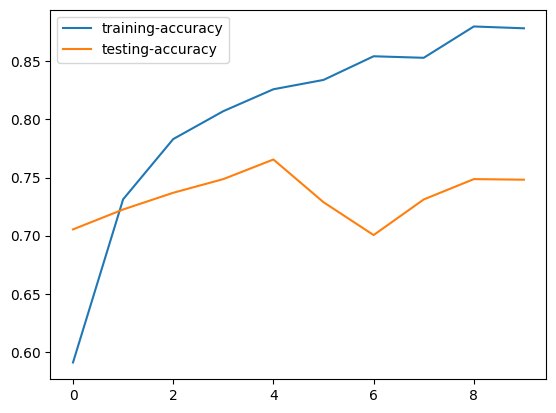

In [43]:
plt.plot(snn_model_history.history['acc'] , label = 'training-accuracy')
plt.plot(snn_model_history.history['val_acc'] , label = 'testing-accuracy')
plt.legend(loc = 'upper left')

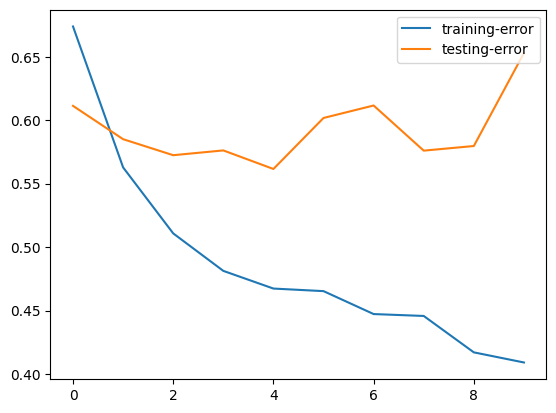

In [44]:
plt.plot(snn_model_history.history['loss'] , label = 'training-error')
plt.plot(snn_model_history.history['val_loss'] , label = 'testing-error')
plt.legend(loc = 'upper right')

#### Predicting on Test data set

In [45]:
sentiment_predictions = snn_model.predict(X_test)
  

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [46]:
sentiment_predictions.shape

(10000, 1)

In [47]:
sentiment_predictions[0][0]

0.9481181

In [48]:
results =[]

for value in sentiment_predictions:
  results.append(value[0])

results

[0.9481181,
 0.98304766,
 0.42058226,
 0.83958817,
 0.80401254,
 0.9992862,
 0.9620169,
 0.59307694,
 0.42058226,
 0.65374875,
 0.42058226,
 0.6716281,
 0.42058226,
 0.42058226,
 0.42058226,
 0.80383265,
 0.8884182,
 0.64989436,
 0.9883613,
 0.4733377,
 0.47893262,
 0.7412729,
 0.6986576,
 0.7735131,
 0.70048666,
 0.9633726,
 0.9998836,
 0.9150023,
 0.990473,
 0.4416369,
 0.42058226,
 0.85714173,
 0.71344954,
 0.42058226,
 0.9845024,
 0.9923058,
 0.42058226,
 0.49831805,
 0.42058226,
 0.42058226,
 0.42058226,
 0.42058226,
 0.42058226,
 0.42058226,
 0.94565797,
 0.99893314,
 0.8183056,
 0.99899435,
 0.99004817,
 0.7052304,
 0.7407658,
 0.99916893,
 0.42058226,
 0.97260666,
 0.42058226,
 0.98990464,
 0.42058226,
 0.9993462,
 0.7933127,
 0.42058226,
 0.42058226,
 0.758288,
 0.42058226,
 0.53452516,
 0.8984649,
 0.8616288,
 0.42058226,
 0.46712428,
 0.4487875,
 0.42058226,
 0.99051034,
 0.8333748,
 0.44085896,
 0.43361175,
 0.99899,
 0.98747665,
 0.42058226,
 0.93894786,
 0.657868,
 0.9881

In [49]:
sentiment_score = np.mean(results)*100

In [50]:
sentiment_score.round(1)

70.1

In [51]:
results = list(map(lambda value : value * 10 , results))

In [52]:
results[:10]

[9.481180906295776,
 9.830476641654968,
 4.205822646617889,
 8.395881652832031,
 8.040125370025635,
 9.9928617477417,
 9.620168805122375,
 5.930769443511963,
 4.205822646617889,
 6.537487506866455]

In [53]:
def evaluate_value(data):
 if data > 5:
  return "Positive"
 elif data < 5:
  return "Negative"
 else:
  return "Neutral"
 

In [54]:
results = list(map(lambda value : evaluate_value(value) , results))

In [55]:
len(results)

10000

In [56]:
result_df = pd.DataFrame(results , columns=['Predicted Sentiment'] , index = range(len(results)))
result_df

,Predicted Sentiment
0,Positive
1,Positive
2,Negative
3,Positive
4,Positive
...,...
9995,Negative
9996,Positive
9997,Positive
9998,Negative


<Axes: xlabel='Predicted Sentiment', ylabel='Count'>

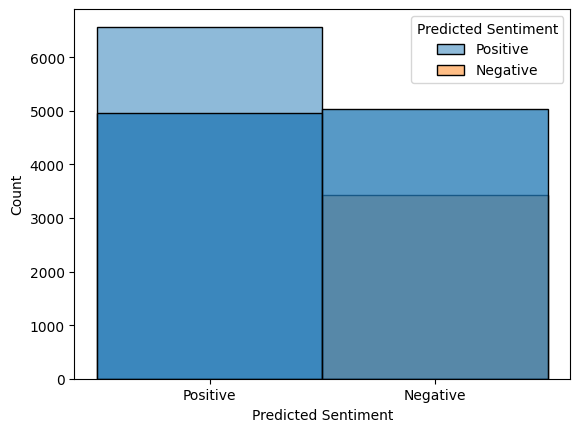

In [57]:
sns.histplot(data=result_df , x="Predicted Sentiment", hue="Predicted Sentiment")
sns.histplot(data=checking_df , x='Real Sentiment', bins = [-0.5, 0.5, 1.5] )

In [58]:
final_df = pd.concat([checking_df , result_df] , axis= 1)

In [59]:
final_df

,Reviews,Real index,Real Sentiment,Predicted Sentiment
0,I really like summerslam due look arena curtai...,33553,1,Positive
1,many television show appeal quite many differe...,9427,1,Positive
2,film quickly get major chase scene ever increa...,199,0,Negative
3,jane austen would definitely approve onegwynet...,12447,1,Positive
4,expectation somewhat high I I go see movie I t...,39489,0,Positive
...,...,...,...,...
9995,although casper van dien michael rooker genera...,28567,0,Negative
9996,I like movie I really sure I start watch enjoy...,25079,1,Positive
9997,yes nonsingaporean see big deal film reference...,18707,1,Positive
9998,far film go likable enough entertaining charac...,15200,0,Negative


In [60]:

#Calculating Percentage for Prediction

pos_count = 0 
neg_count = 0  

for sentiment in final_df['Predicted Sentiment']:
 if sentiment == "Positive":
  pos_count = pos_count + 1
 else:
  neg_count = neg_count + 1

pos_percent = (pos_count /(pos_count + neg_count)) * 100
neg_percent = (neg_count /(pos_count + neg_count)) * 100

In [61]:
print('Positive Sentiments Predicted:', pos_count )
print('Negative Sentiments Predicted:', neg_count )
print('Positive Sentiments Percent:', pos_percent.__round__(1) )
print('Negative Sentiments Percent:', neg_percent.__round__(1) )

Positive Sentiments Predicted: 6570
Negative Sentiments Predicted: 3430
Positive Sentiments Percent: 65.7
Negative Sentiments Percent: 34.3


#### Convolutional Neural Network

In [62]:
#Creating Convolutional Neural Network Model 

cnn_model = tf.keras.Sequential()

cnn_model.add(tf.keras.layers.Embedding(input_dim= vocab_length , output_dim= 200 , weights= [embedding_matrix] , trainable = False , input_length = maxlen))
cnn_model.add(tf.keras.layers.Conv1D(128,5,activation='relu'))
cnn_model.add(tf.keras.layers.GlobalMaxPooling1D())
cnn_model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

c:\Users\Nitro 5\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [63]:
cnn_model.compile(optimizer='adam' , loss ='binary_crossentropy' , metrics=['acc'])

In [64]:
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │    35,080,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,080,400 (133.82 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 35,080,400 (133.82 MB)

In [65]:
X_train.shape

(40000, 600)

In [66]:
cnn_model_history = cnn_model.fit(X_train,y_train , batch_size= 1000 , epochs = 10 , verbose = 1 , validation_split= 0.2)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - acc: 0.6712 - loss: 0.5989 - val_acc: 0.8026 - val_loss: 0.4392
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - acc: 0.8316 - loss: 0.3975 - val_acc: 0.8342 - val_loss: 0.3781
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - acc: 0.8611 - loss: 0.3395 - val_acc: 0.8472 - val_loss: 0.3543
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - acc: 0.8811 - loss: 0.3033 - val_acc: 0.8541 - val_loss: 0.3398
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - acc: 0.8977 - loss: 0.2744 - val_acc: 0.8568 - val_loss: 0.3308
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - acc: 0.9099 - loss: 0.2498 - val_acc: 0.8616 - val_loss: 0.3247
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - acc: 0.9204 - loss: 0.2279 - val_acc: 0.8631 - val_loss: 0.3208
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - acc: 0.9300 - loss: 0.2079 - val_acc: 0.8659 - val_loss: 0.3178
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - acc: 0.9396 - loss: 

In [67]:
score = cnn_model.evaluate(X_test , y_test , verbose= 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.8629 - loss: 0.3158


In [68]:
with open ('cnn_glove_model' , 'wb') as file:
 pickle.dump(cnn_model , file)

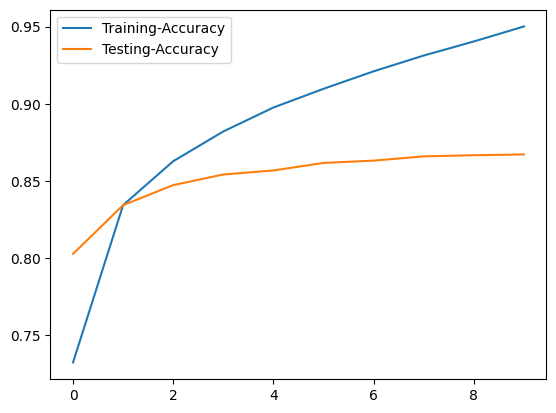

In [69]:
plt.plot(cnn_model_history.history['acc'] , label ='Training-Accuracy')
plt.plot(cnn_model_history.history['val_acc'] , label ='Testing-Accuracy')
plt.legend(loc = 'upper left')
plt.show()

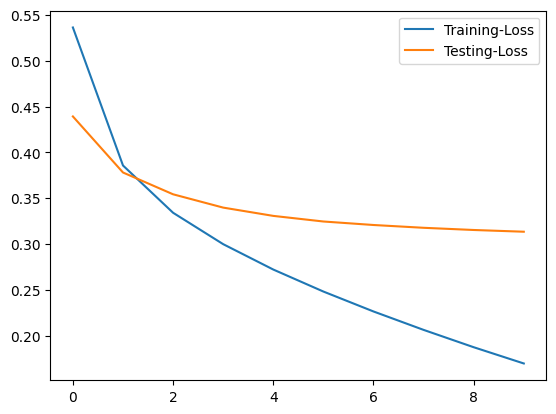

In [70]:
plt.plot(cnn_model_history.history['loss'] , label ='Training-Loss')
plt.plot(cnn_model_history.history['val_loss'] , label ='Testing-Loss')
plt.legend(loc = 'upper right')
plt.show()

In [71]:
cnn_predictions = cnn_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


In [72]:
cnn_predictions

array([[0.24163188],
       [0.8640585 ],
       [0.12505408],
       ...,
       [0.5981192 ],
       [0.06577503],
       [0.40314257]], dtype=float32)

In [73]:
cnn_results =[]

for data in cnn_predictions:
 cnn_results.append(data[0])

cnn_results[:5]

[0.24163188, 0.8640585, 0.12505408, 0.97767216, 0.39790106]

In [74]:
cnn_results = list(map(lambda data: data * 10 , cnn_results))

In [75]:
def evaluate_value(data):
 if data > 5:
  return "Positive"
 elif data < 5:
  return "Negative"
 else:
  return "Neutral"

In [76]:
cnn_results = list(map(lambda data: evaluate_value(data) , cnn_results))

In [77]:
cnn_results

['Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Negative',

In [78]:
cnn_result_df = pd.DataFrame(cnn_results , columns=['Predicted Sentiment'] , index = range(len(cnn_results)))
cnn_result_df

,Predicted Sentiment
0,Negative
1,Positive
2,Negative
3,Positive
4,Negative
...,...
9995,Negative
9996,Positive
9997,Positive
9998,Negative


<Axes: xlabel='Predicted Sentiment', ylabel='Count'>

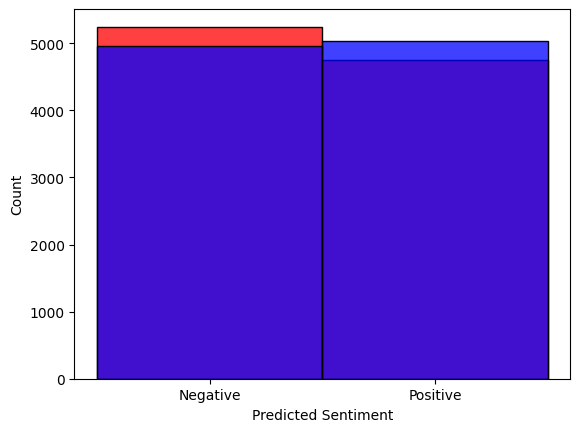

In [79]:
sns.histplot(data=cnn_result_df , x="Predicted Sentiment", color= 'red')
sns.histplot(data=checking_df , x='Real Sentiment', bins = [-0.5, 0.5, 1.5] , color = 'blue' )

In [80]:
cnn_final_df = pd.concat([checking_df , cnn_result_df] , axis= 1)

In [81]:
cnn_final_df.head(20)

,Reviews,Real index,Real Sentiment,Predicted Sentiment
0,I really like summerslam due look arena curtai...,33553,1,Negative
1,many television show appeal quite many differe...,9427,1,Positive
2,film quickly get major chase scene ever increa...,199,0,Negative
3,jane austen would definitely approve onegwynet...,12447,1,Positive
4,expectation somewhat high I I go see movie I t...,39489,0,Negative
5,I watch movie fairly regular basis life never ...,42724,1,Positive
6,story hope highlight tragic reality youth face...,10822,1,Positive
7,okay I get purgatory thing first time I watch ...,49498,1,Negative
8,I disappointed series lot cool graphic level d...,4144,0,Negative
9,first 30 minute tinseltown finger teeter remot...,36958,0,Negative


In [82]:
#Calculating Percentage for Prediction

pos_count = 0 
neg_count = 0  

for sentiment in cnn_final_df['Predicted Sentiment']:
 if sentiment == "Positive":
  pos_count = pos_count + 1
 else:
  neg_count = neg_count + 1

pos_percent = (pos_count /(pos_count + neg_count)) * 100
neg_percent = (neg_count /(pos_count + neg_count)) * 100

In [83]:
print('Positive Sentiments Predicted:', pos_count )
print('Negative Sentiments Predicted:', neg_count )
print('Positive Sentiments Percent:', pos_percent.__round__(1) )
print('Negative Sentiments Percent:', neg_percent.__round__(1) )

Positive Sentiments Predicted: 4754
Negative Sentiments Predicted: 5246
Positive Sentiments Percent: 47.5
Negative Sentiments Percent: 52.5


#### Recurrent Neural Network (RNN) : LSTM 

In [84]:
rnn_model = tf.keras.Sequential()

rnn_model.add(tf.keras.layers.Embedding(input_dim=vocab_length, 
                                        output_dim=200, 
                                        weights=[embedding_matrix], 
                                        trainable=False, 
                                        input_length=maxlen))
rnn_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)))
rnn_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
rnn_model.add(tf.keras.layers.Dropout(0.5))
rnn_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

c:\Users\Nitro 5\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [85]:
rnn_model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['acc'])

In [86]:
rnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │    35,080,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,080,400 (133.82 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 35,080,400 (133.82 MB)

In [87]:
rnn_model_history = rnn_model.fit(X_train , y_train , batch_size= 200 , epochs = 10 , verbose= 1 , validation_split= 0.2)

Epoch 1/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 795s 5s/step - acc: 0.7018 - loss: 0.5691 - val_acc: 0.8238 - val_loss: 0.4084
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 856s 5s/step - acc: 0.8144 - loss: 0.4259 - val_acc: 0.8453 - val_loss: 0.3709
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 975s 6s/step - acc: 0.8368 - loss: 0.3868 - val_acc: 0.8524 - val_loss: 0.3583
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 990s 6s/step - acc: 0.8514 - loss: 0.3562 - val_acc: 0.8537 - val_loss: 0.3484
Epoch 5/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 1013s 6s/step - acc: 0.8542 - loss: 0.3467 - val_acc: 0.8670 - val_loss: 0.3210
Epoch 6/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 1023s 6s/step - acc: 0.8726 - loss: 0.3090 - val_acc: 0.8675 - val_loss: 0.3194
Epoch 7/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 1048s 7s/step - acc: 0.8835 - loss: 0.2871 - val_acc: 0.8751 - val_loss: 0.3039
Epoch 8/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 1052s 7s/step - acc: 0.8888 - loss: 0.2777 - val_acc: 0.8795 - val_loss: 0.2984
Epoch 9/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 1066

In [88]:
score = rnn_model.evaluate(X_test , y_test , verbose= 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 84s 266ms/step - acc: 0.8682 - loss: 0.3115


In [89]:
with open ('lstm_model_glove' , 'wb') as file:
 pickle.dump(rnn_model , file)

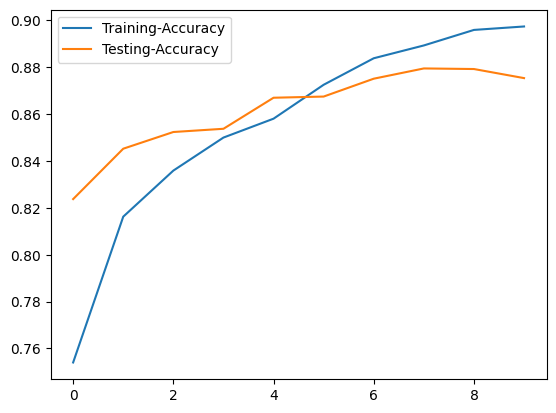

In [90]:
plt.plot(rnn_model_history.history['acc'] , label ='Training-Accuracy')
plt.plot(rnn_model_history.history['val_acc'] , label ='Testing-Accuracy')
plt.legend(loc = 'upper left')
plt.show()

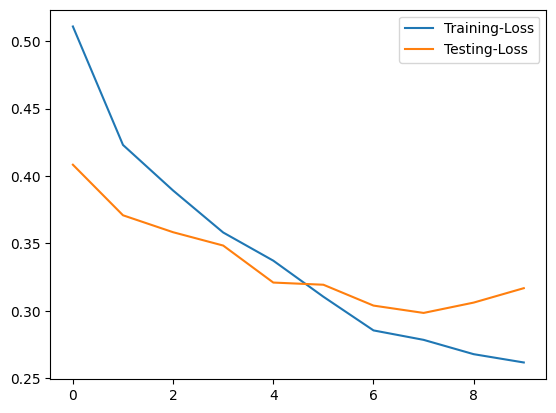

In [91]:
plt.plot(rnn_model_history.history['loss'] , label ='Training-Loss')
plt.plot(rnn_model_history.history['val_loss'] , label ='Testing-Loss')
plt.legend(loc = 'upper right')
plt.show()

In [92]:
rnn_predictions = rnn_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 79s 253ms/step


In [93]:
rnn_predictions

array([[0.34027043],
       [0.96749574],
       [0.20618573],
       ...,
       [0.20598534],
       [0.05198625],
       [0.65937173]], dtype=float32)

In [94]:
rnn_results =[]

for data in cnn_predictions:
 rnn_results.append(data[0])

rnn_results[:5]

[0.24163188, 0.8640585, 0.12505408, 0.97767216, 0.39790106]

In [95]:
rnn_results = list(map(lambda data: data * 10 , rnn_results))

In [96]:
rnn_results[:5]

[2.41631880402565,
 8.640584945678711,
 1.2505407631397247,
 9.776721596717834,
 3.979010581970215]

In [97]:
def evaluate_value(data):
 if data > 5:
  return "Positive"
 elif data < 5:
  return "Negative"
 else:
  return "Neutral"

In [98]:
rnn_results = list(map(lambda data: evaluate_value(data) , rnn_results))

In [99]:
rnn_results

['Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Negative',

In [100]:
rnn_result_df = pd.DataFrame(rnn_results , columns= ['Predicted Sentiment'] , index = range(len(rnn_results)))
                             
rnn_result_df

,Predicted Sentiment
0,Negative
1,Positive
2,Negative
3,Positive
4,Negative
...,...
9995,Negative
9996,Positive
9997,Positive
9998,Negative


In [101]:
rnn_final_df = pd.concat([checking_df , rnn_result_df] , axis= 1)

In [102]:
rnn_final_df.head(20)

,Reviews,Real index,Real Sentiment,Predicted Sentiment
0,I really like summerslam due look arena curtai...,33553,1,Negative
1,many television show appeal quite many differe...,9427,1,Positive
2,film quickly get major chase scene ever increa...,199,0,Negative
3,jane austen would definitely approve onegwynet...,12447,1,Positive
4,expectation somewhat high I I go see movie I t...,39489,0,Negative
5,I watch movie fairly regular basis life never ...,42724,1,Positive
6,story hope highlight tragic reality youth face...,10822,1,Positive
7,okay I get purgatory thing first time I watch ...,49498,1,Negative
8,I disappointed series lot cool graphic level d...,4144,0,Negative
9,first 30 minute tinseltown finger teeter remot...,36958,0,Negative


In [103]:
#Calculating Percentage for Prediction

pos_count = 0 
neg_count = 0  

for sentiment in rnn_final_df['Predicted Sentiment']:
 if sentiment == "Positive":
  pos_count = pos_count + 1
 else:
  neg_count = neg_count + 1

pos_percent = (pos_count /(pos_count + neg_count)) * 100
neg_percent = (neg_count /(pos_count + neg_count)) * 100

In [104]:
print('Positive Sentiments Predicted:', pos_count )
print('Negative Sentiments Predicted:', neg_count )
print('Positive Sentiments Percent:', pos_percent.__round__(1) )
print('Negative Sentiments Percent:', neg_percent.__round__(1) )

Positive Sentiments Predicted: 4754
Negative Sentiments Predicted: 5246
Positive Sentiments Percent: 47.5
Negative Sentiments Percent: 52.5
